In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1 style="background-color: #bdbbbb; color: white; padding:10px">Conhecendo a base de dados</h1>

Base de dados com dados referentes a preços de aluguéis de diferentes imóveis do Rio de Janeiro, além de um quadro no trello com as demandas e atividades que precisamos realizar no decorrer do projeto.

In [2]:
dados = pd.read_csv('data/aluguel.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [4]:
dados['Tipo'] # pandas.core.series.Series

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [5]:
dados[['Quartos', 'Valor']] # pandas.core.frame.DataFrame

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


<h2 style="background-color: gray; color: white;">EDA - Exploratory Data Analysis</h2>  

__Algumas perguntas que podemos fazer nesse momento:__  

1. Quais os valores médios de aluguel por tipo de imóvel?     
        
```python
 dados.groupby('Tipo')['Valor'].mean() 
```
Gera uma Series. Para gerar um DataFrame colocamos:  
```python
 dados.groupby('Tipo')[['Valor']].mean() 
```

2. Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [6]:
# Agrupar os dados com base no tipo de imóvel.
df_precos_tipos = dados.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values(by='Valor')
df_precos_tipos

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


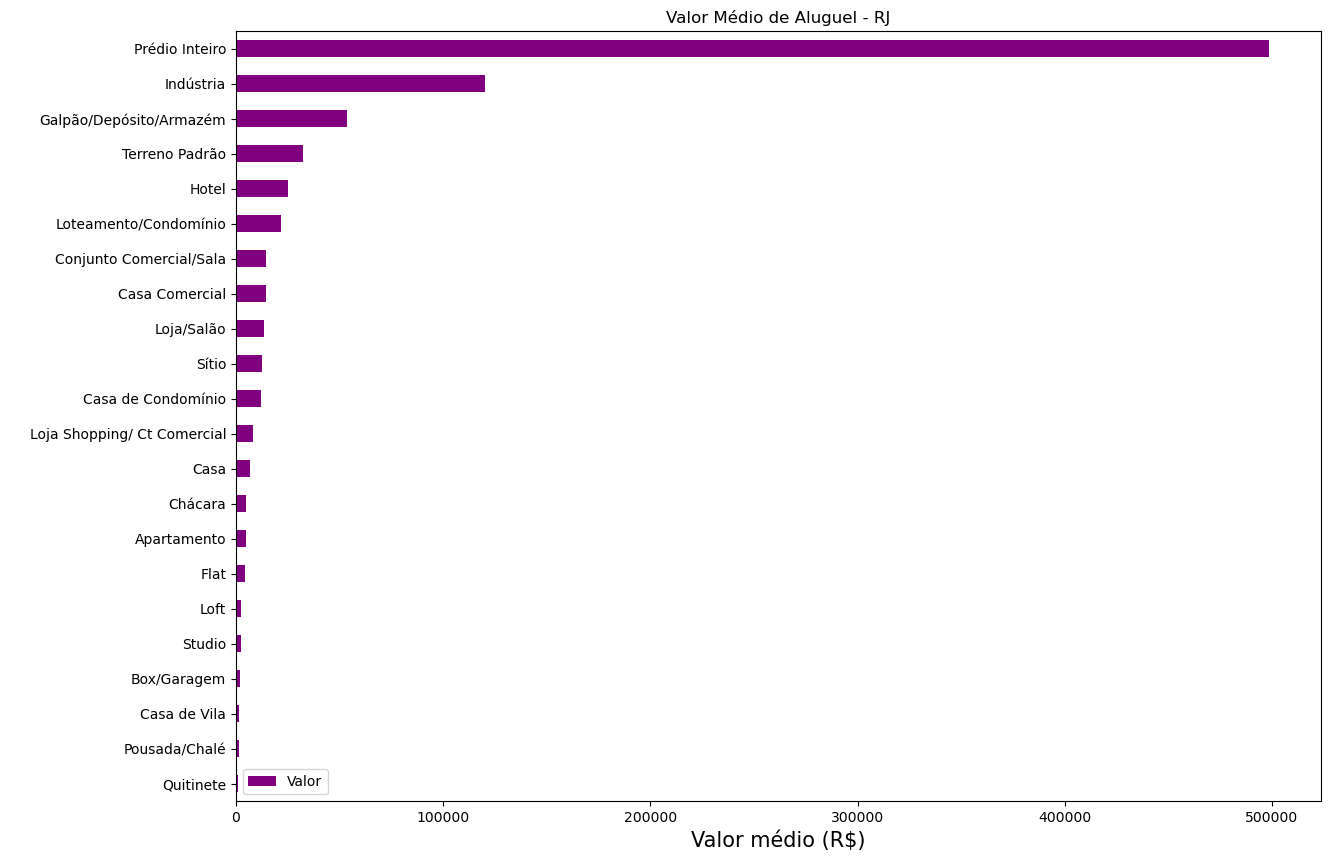

In [7]:
df_precos_tipos.plot(kind='barh', figsize=(14, 10), color='purple');
plt.title("Valor Médio de Aluguel - RJ")
plt.xlabel("Valor médio (R$)", fontsize=15)
plt.ylabel(" ");

<h3 style="background-color: gray; color: white;">Removendo imóveis comerciais</h3>

In [8]:
# listar todos os tipos de imóveis da base de dados
print(f'Tipos de imóveis na base de dados:\n{dados.Tipo.unique()}')

# Lista com imoveis comerciais
imoveis_comerciais: list[str] = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

Tipos de imóveis na base de dados:
['Quitinete' 'Casa' 'Conjunto Comercial/Sala' 'Apartamento'
 'Casa de Condomínio' 'Prédio Inteiro' 'Flat' 'Loja/Salão'
 'Galpão/Depósito/Armazém' 'Casa Comercial' 'Casa de Vila'
 'Terreno Padrão' 'Box/Garagem' 'Loft' 'Loja Shopping/ Ct Comercial'
 'Chácara' 'Loteamento/Condomínio' 'Sítio' 'Pousada/Chalé' 'Studio'
 'Hotel' 'Indústria']


In [9]:
dados.query('@imoveis_comerciais in Tipo') # DataFrame com apenas imóveis comerciais


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [10]:
df = dados.query('@imoveis_comerciais not in Tipo') # DataFrame com imóveis não-comerciais
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


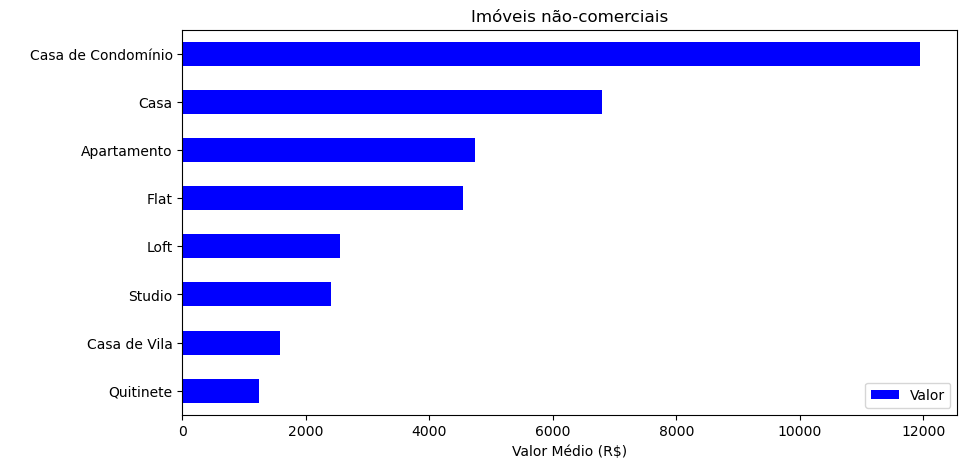

In [11]:
# Agrupar os tipos por valor e fazer o gráfico pela media
df_preco_tipo = df.groupby("Tipo")[["Valor"]].mean().sort_values(by="Valor")
df_preco_tipo.plot(kind='barh',figsize=(10,5), color='blue')
plt.title("Imóveis não-comerciais")
plt.xlabel("Valor Médio (R$)")
plt.ylabel(' ');

<h3 style="background-color: gray; color: white;">Percentual de cada tipo de imóvel na base de dados</h3>  

-  Essa análise é interessante para saber quanto os dados estão desbalanceados. O time de ML poderia ter conclusões precipitadas se não obtiverem o "mesmo espaço amostral" de cada categoria.  

O método `value_counts()` do Pandas é usado para retornar uma série contendo contagens de valores únicos em uma coluna ou em um objeto Series do Pandas.

In [12]:
df['Tipo'].value_counts(normalize=True) #Series

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

In [13]:
df['Tipo'].value_counts(normalize=True).to_frame().sort_values(by='proportion', ascending=True) 


,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


In [14]:
df_percentual = df['Tipo'].value_counts(normalize=True).to_frame().sort_values(by='proportion', ascending=True) 
df_percentual

,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


In [15]:
# Renomear a coluna
df_percentual.rename(columns={'proportion': 'Percentual (%)'}, inplace=True)
df_percentual

,Percentual (%)
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


<Axes: ylabel='Tipo'>

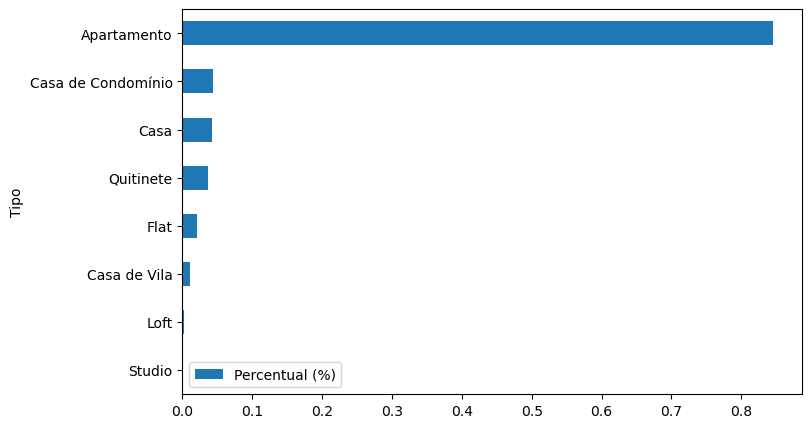

In [16]:
df_percentual.plot(kind='barh', figsize=(8,5))




Mais de 80% do `aluguel.csv` é conteúdo de Apartamentos. A análise então será direcionada apenas para esse subconjunto.

In [17]:
df_apartamentos = dados.query("Tipo == 'Apartamento'")
df_apartamentos.head(8)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


<h4 style="background-color: gray; color: white;">Desafio </h4>    

1.  Calcular a média de quartos por apartamento;  
2.  Conferir quantos bairros únicos existem na nossa base de dados;  
3.  Analisar quais bairros possuem a média de valor de aluguel mais elevadas;  
4.  Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.  

In [18]:
#1 
df_apartamentos['Quartos'].mean()

2.481568707761622

In [19]:
#2 
df['Bairro'].unique().size
# df['Bairro'].nunique()

154

In [20]:
#3
df_apartamentos.groupby('Bairro')[['Valor']].mean().sort_values(by='Valor')

,Valor
Bairro,
Ricardo de Albuquerque,340.000000
Paciência,510.000000
Santa Cruz,590.000000
Cosmos,610.000000
Inhoaíba,650.000000
...,...
Botafogo,9369.207116
Ipanema,9487.205317
Cidade Jardim,12000.000000


<Axes: ylabel='Bairro'>

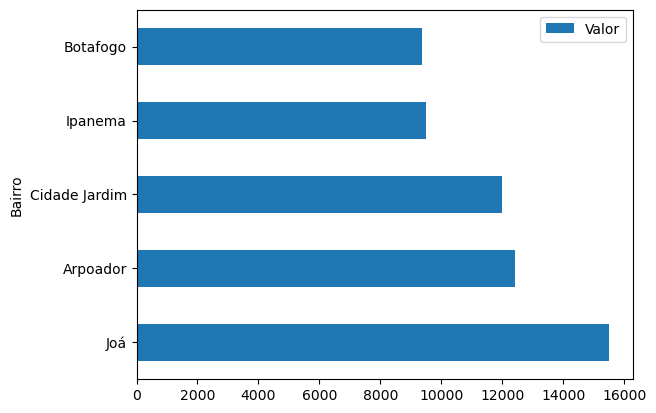

In [21]:
#4
bairros_mais_caros = df_apartamentos.groupby('Bairro')[['Valor']].mean().sort_values(by='Valor',ascending=False)
bairros_mais_caros.head(5).plot(kind='barh')

<h2 style="background-color: gray; color: white;padding=15px">Tratando e filtrando dados </h2>  

- Verficar a existência de dados nulos e tratá-los  

Existem diversas formas de tratar dados nulos com o Pandas. Algumas das principais formas são:

> __Remover os dados nulos__: É possível remover as linhas ou colunas que possuem valores nulos utilizando o método dropna() . Esse  método remove todas as linhas ou colunas que possuem pelo menos um valor nulo.

> __Preencher os dados nulos__: Utilizando o método fillna(), podemos preencher os valores nulos com um valor específico. Além disso, também é possível utilizar argumentos específicos do método fillna() como o method=”ffill” ou method=”bfill” para preencher os valores nulos com o valor anterior ou posterior, respectivamente.

> __Interpolar os dados nulos__: É possível utilizar o método interpolate() para preencher os valores nulos com valores interpolados, ou seja, valores calculados a partir dos valores vizinhos.

In [22]:
df_apartamentos.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [23]:
df_apartamentos.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

Abordagem: substituir Nan por zeros.

In [24]:
df_apartamentos.fillna(value=0, inplace=True)

C:\Users\VictorCampos\AppData\Local\Temp\ipykernel_47248\3274130470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamentos.fillna(value=0, inplace=True)


In [25]:
df_apartamentos.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [26]:
# Remover registros inconsistentes - col valor ou condominio = 0;

df_apartamentos.query("Valor == 0 | Condominio ==0")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [27]:
# pegando indices para remover
index_mask = df_apartamentos.query("Valor == 0 | Condominio == 0").index

In [28]:
df_apartamentos.drop(index_mask, axis=0, inplace=True)

C:\Users\VictorCampos\AppData\Local\Temp\ipykernel_47248\661171090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamentos.drop(index_mask, axis=0, inplace=True)


In [29]:
# Checagem dos registros 
df_apartamentos.query("Valor == 0 | Condominio ==0")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [30]:
df_apartamentos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [31]:
df_apartamentos.drop('Tipo', axis=1, inplace=True)

C:\Users\VictorCampos\AppData\Local\Temp\ipykernel_47248\2185037838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamentos.drop('Tipo', axis=1, inplace=True)


<h3 style="background-color: gray; color: white; padding:10px"> Aplicando Filtros. </h3>  

1. Apartamentos que possuem 1 quarto e aluguel menor que R$ 1200;  
2. Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70 metros quadrados  

In [32]:
filtro1 = (df_apartamentos['Quartos'] == 1) * (df_apartamentos['Valor'] < 1200)
# selecao1 & selecao2

In [33]:
df_apartamentos[filtro1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [34]:
df1 = df_apartamentos[filtro1]
df1

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [35]:
filtro2 = (df['Quartos'] >= 2) * (df['Valor'] < 3000) * (df['Area'] > 70)

In [36]:
df_apartamentos[filtro2]


C:\Users\VictorCampos\AppData\Local\Temp\ipykernel_47248\286095921.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_apartamentos[filtro2]


,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


In [37]:
# salvando um csv
df_apartamentos.to_csv('dados_apartamentos.csv',index=False, sep=';') 

In [38]:
pd.read_csv('dados_apartamentos.csv', delimiter=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


[User Guide - IO tools Pandas](https://pandas.pydata.org/docs/user_guide/io.html#io-tools-text-csv-hdf5) 

`Desafio`

In [39]:
df_alunos = pd.read_csv('data/alunos.csv')
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


In [40]:
# df.isnull().sum() ... df.fillna(0)
df_alunos.dropna(inplace=True)
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
11,Igor,24,4.5,False
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True


In [41]:
# 2 - Remover os alunos Alice e Carlos
df_alunos.drop([7,8], inplace=True)

## Melhor forma: df_alunos.query('Nome == "Alice" | Nome == "Carlos" ').index -> mask

In [42]:
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
6,Dara,21,7.0,True
11,Igor,24,4.5,False
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [43]:
# 3 - Filtro para alunos aprovados
filtro_aprovados = (df_alunos['Aprovado'] == True)

df_alunos[filtro_aprovados]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [44]:
# 4 - Salvar um csv dos alunos aprovados
df_alunos[filtro_aprovados].to_csv('alunos_aprovados.csv',index=False)

In [45]:
pd.read_csv('alunos_aprovados.csv')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,7.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,7.0,True
6,Nadia,34,8.0,True


> Extra:  Substitua as notas 7.0 da base de dados por 8.0. Dica: pesquise pelo método replace.

In [46]:
df_alunos # antes de substituir

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
6,Dara,21,7.0,True
11,Igor,24,4.5,False
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [47]:
df_alunos.replace(to_replace=7, value=8) # depois da substituição, Dara 6 e Mylena 15 foram afetadas.

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
6,Dara,21,8.0,True
11,Igor,24,4.5,False
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


<h3 style="background-color: gray; color: white;"> Manipulando os dados</h3>  

__Criando colunas numéricas__  

- `valor_por_mes`: essa coluna deve conter os gastos mensais de cada imóvel, incluindo aluguel e condomínio;  
- `valor_por_ano`:  IPTU + 12 meses de aluguel e condomínio

In [48]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [52]:
dados['Valor_por_mes'] = dados["Valor"] + dados['Condominio']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [53]:
dados['Valor_Anual'] = dados['Valor_por_mes']*12 + dados['IPTU']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_Anual
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


__Criando colunas categóricas__  

- `Descrição`: essa coluna deve possui uma sumarização das principais informações dos imóveis que serão apresentadas no site: tipo de imóvel, bairro, quantidade de quartos e vagas de garagem.  
- `Possui_suite`: informar apenas se o imóvel possui suite ou não, sem se importar com a quantidades.

In [88]:
# Minha solução
dados['Possui_suite'] = (dados['Suites'] > 0).astype(int)
dados.head()

# Solução Alura : dados['Suites'].apply(lambda x: "Sim" if x > 0 else "Não")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_Anual,Possui_suite,Descrição
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,0,Quitinete localizado(a) no bairro Copacabana c...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,1,Casa localizado(a) no bairro Jardim Botânico c...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,0,Conjunto Comercial/Sala localizado(a) no bairr...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,0,Apartamento localizado(a) no bairro Centro com...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,0,Apartamento localizado(a) no bairro Higienópol...


In [79]:
dados['Descrição'] = dados['Tipo'] + ' localizado(a) no bairro ' +  dados['Bairro'] + \
    ' com ' + dados['Quartos'].astype(str) + ' quarto(s) e ' + dados['Vagas'].astype(str)  + ' vaga(s) de garagem.'

In [80]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_Anual,Possui_suite,Descrição
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,False,Quitinete localizado(a) no bairro Copacabana c...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,True,Casa localizado(a) no bairro Jardim Botânico c...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,False,Conjunto Comercial/Sala localizado(a) no bairr...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,False,Apartamento localizado(a) no bairro Centro com...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,False,Apartamento localizado(a) no bairro Higienópol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,False,Quitinete localizado(a) no bairro Centro com 0...
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,True,Apartamento localizado(a) no bairro Jacarepagu...
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,False,Apartamento localizado(a) no bairro São Franci...
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,3760.0,NaN,False,Apartamento localizado(a) no bairro Leblon com...


In [81]:
dados['Descrição'][0]

'Quitinete localizado(a) no bairro Copacabana com 1 quarto(s) e 0 vaga(s) de garagem.'

In [89]:
dados['Suites'].apply(lambda x: "Sim" if x > 0 else "Não")

0        Não
1        Sim
2        Não
3        Não
4        Não
        ... 
32955    Não
32956    Sim
32957    Não
32958    Não
32959    Não
Name: Suites, Length: 32960, dtype: object

4 - Utilização do método apply() para aplicar uma função a uma coluna existente e criar uma nova coluna:
import pandas as pd

```python
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df['C'] = df['A'].apply(lambda x: x * 2)
df
```

<h2 style="background-color: gray; color: white;">Desafios</h2>

In [90]:
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
6,Dara,21,7.0,True
11,Igor,24,4.5,False
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [92]:
# 1) Os alunos participaram de uma atividade extracurricular e ganharam pontos
#  extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. 
# Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos
#  extras de cada aluno, ou seja, 40% da nota atual deles.
df_alunos['Pontos_extras'] = df_alunos['Notas'] * 0.4
df_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0
6,Dara,21,7.0,True,2.8
11,Igor,24,4.5,False,1.8
12,Sthefanie,26,9.5,True,3.8
13,Mirla,25,9.0,True,3.6
15,Mylena,29,7.0,True,2.8
17,Nadia,34,8.0,True,3.2


In [95]:
# 2 - Notas finais
df_alunos['Notas_finais'] = df_alunos['Notas'] + df_alunos['Pontos_extras']
df_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0
6,Dara,21,7.0,True,2.8,9.8
11,Igor,24,4.5,False,1.8,6.3
12,Sthefanie,26,9.5,True,3.8,13.3
13,Mirla,25,9.0,True,3.6,12.6
15,Mylena,29,7.0,True,2.8,9.8
17,Nadia,34,8.0,True,3.2,11.2


In [98]:
df_alunos['Aprovado_final'] = df_alunos['Notas_finais'].apply(lambda x: x > 6)
df_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True
6,Dara,21,7.0,True,2.8,9.8,True
11,Igor,24,4.5,False,1.8,6.3,True
12,Sthefanie,26,9.5,True,3.8,13.3,True
13,Mirla,25,9.0,True,3.6,12.6,True
15,Mylena,29,7.0,True,2.8,9.8,True
17,Nadia,34,8.0,True,3.2,11.2,True


In [ ]:
# 4 - alunos aprovados após extras
df_alunos['Aprovado'] == df_alunos['Aprovado_final'] 

# aonde for True, nada mudou. Devemos pegar os false

0      True
2      True
3     False
4      True
6      True
11    False
12     True
13     True
15     True
17     True
dtype: bool

In [114]:
selecao = (df_alunos['Aprovado'] == False) & (df_alunos['Aprovado_final'] == True)
df_alunos[selecao]

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.0,7.0,True
11,Igor,24,4.5,False,1.8,6.3,True
